In [1]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing few required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data

In [3]:
# Loading the data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
# Checking the 1st five rows of train data
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Checking the 1st five rows of test data
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Checking the count of rows x columns of both train and test set
df_train.shape, df_test.shape

((891, 12), (418, 11))

In [6]:
# Checking the data types and count of values in every column
df_train.info(), df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

(None, None)

In [7]:
# General idea of the data
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Calculating the percentage of missing values in train set
round(100*df_train.isnull().sum()/len(df_train.index),2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [9]:
# Calculating the percentage of missing values in test set
round(100*df_test.isnull().sum()/len(df_test.index),2)

PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            20.57
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.24
Cabin          78.23
Embarked        0.00
dtype: float64

### Data Visualization and Preparation

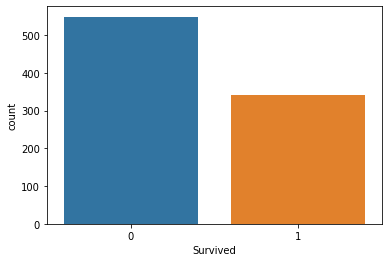

In [10]:
# Class imbalance
sns.countplot(x = 'Survived', data=df_train)

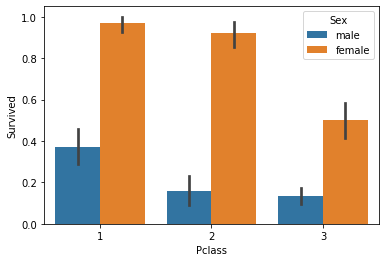

In [11]:
# Validation the general idea about the survivals with the data
sns.barplot(x='Pclass', y='Survived',hue='Sex', data=df_train)

In [12]:
# Since Cabin has very high percentage of missing values in both train and test set, it would  be better to drop this feature
# Dropping Name and Ticket, as it's not feasible to either segment them or work with them
df_train.drop(['Cabin','Name','Ticket'], axis=1, inplace=True)
df_test.drop(['Cabin','Name','Ticket'], axis=1, inplace=True)

In [13]:
# Count of gender
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [14]:
# Mapping male to 1 and female to 0 for both the data sets
df_train['Sex'] = df_train['Sex'].map({'male':1, 'female':0})
df_test['Sex'] = df_test['Sex'].map({'male':1, 'female':0})

In [15]:
# Count of location
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
# Imputing Embarked with mode
df_train['Embarked'].fillna('S', inplace=True)

In [17]:
# Frequency Encoding of Embarked
embark = df_train.groupby('Embarked').size()/len(df_train)
df_train['Embarked'] = df_train['Embarked'].map(embark)
df_test['Embarked'] = df_test['Embarked'].map(embark)

In [18]:
# Separating the dependent and independent variable
y_train = df_train['Survived']
X_train = df_train.drop('Survived', axis=1)

In [19]:
# Importing KNNImputer for imputing the numeric features
from sklearn.impute import KNNImputer

In [20]:
# Instantiating KNNImputer
imputer = KNNImputer(n_neighbors=2)

In [21]:
# Imputing missing records of Age in train set
X_train['Age'] = imputer.fit_transform(X_train[['Age']])

In [22]:
# Imputing missing records of Age and Fare in test set
df_test['Age'] = imputer.transform(df_test[['Age']])
df_test['Fare']  = imputer.transform(df_test[['Fare']])

In [23]:
# Moving PassengerId from train and test set
train_PID = X_train.pop('PassengerId')
test_PID = df_test.pop('PassengerId')

In [24]:
# Merging the onboard siblings and parents
X_train['family'] = X_train['SibSp'] + X_train['Parch']
df_test['family'] = df_test['SibSp'] + df_test['Parch']

# Dropping the features representing the siblings and parents separately
X_train.drop(['SibSp','Parch'], axis=1, inplace=True)
df_test.drop(['SibSp','Parch'], axis=1, inplace=True)

In [25]:
# Importing library for standardising values
from sklearn.preprocessing import StandardScaler

# Instantiating StandardScaler
scaler = StandardScaler()

In [26]:
# Scaling train and test set
var = ['Age','Fare','family']
X_train[var] = scaler.fit_transform(X_train[var])
df_test[var] = scaler.transform(df_test[var])

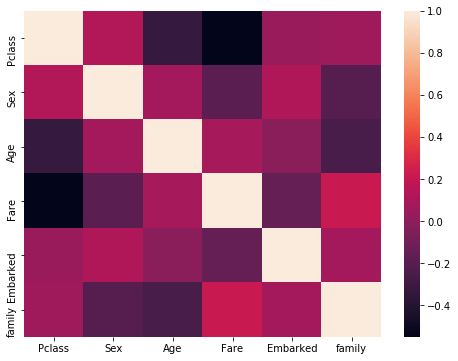

In [27]:
# Correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(X_train.corr())
plt.show()

### PCA

In [28]:
# Importing library to remove multicolinearity
from sklearn.decomposition import PCA

# Instantiating PCA
pca = PCA()

# Fitting the training data
X_train_pca = pca.fit_transform(X_train)

In [29]:
# Most information captured by cumulative pca components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0     36.72
1     69.37
2     85.56
3     93.26
4     98.47
5    100.00
dtype: float64


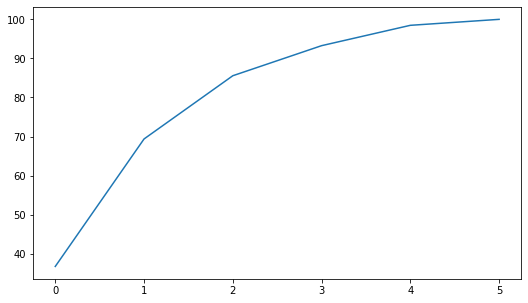

In [30]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

In [31]:
# Importing a few libraries
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# logistic regression - the class weight is used to handle class imbalance
logistic = LogisticRegression(class_weight='balanced')

# create pipeline
steps = [("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [3,4,5], 'logistic__C': [0.1, 0.5, 0.8, 0.9, 1, 2,], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc')

In [32]:
# fit model
model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_sca...
                                       

In [33]:
# Best Paramters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8532237026877327
Best hyperparameters:  {'logistic__C': 0.9, 'logistic__penalty': 'l2', 'pca__n_components': 5}


In [34]:
# Importing library
from sklearn.metrics import confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score

# predict churn on test data
y_pred = model.predict(X_train)

# create confusion matrix
cm = confusion_matrix(y_train, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob1 = model.predict_proba(X_train)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train, y_pred_prob1),2))

[[440 109]
 [ 77 265]]
Sensitivity: 	0.77
Specificity: 	0.8
AUC:    	 0.85


### Using ADASYN to handle class imbalance

In [35]:
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

In [36]:
y_train_adasyn.value_counts()

0    549
1    540
Name: Survived, dtype: int64

In [37]:
# Instantiating PCA
pca = PCA()

# Instantiating logistic regression - the class weight is used to handle class imbalance
logistic = LogisticRegression(class_weight='balanced')

# Creating pipeline
steps = [("pca", pca),
         ("logistic", logistic)
        ]

pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [3,4,5], 'logistic__C': [0.1, 0.5, 0.8, 0.9, 1, 2,], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc')

In [38]:
# fit model
model.fit(X_train_adasyn, y_train_adasyn)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_sca...
                                       

In [39]:
# Best Paramters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.7975544435177463
Best hyperparameters:  {'logistic__C': 1, 'logistic__penalty': 'l2', 'pca__n_components': 5}


In [40]:
# predict churn on test data
y_pred = model.predict(X_train_adasyn)

# create confusion matrix
cm = confusion_matrix(y_train_adasyn, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_train_adasyn, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob1 = model.predict_proba(X_train_adasyn)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_train_adasyn, y_pred_prob1),2))

[[423 126]
 [166 374]]
Sensitivity: 	0.69
Specificity: 	0.77
AUC:    	 0.8


In [41]:
from xgboost import XGBClassifier

In [42]:
# Importing library to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train_xg, X_test_xg, y_train_xg, y_test_xg = train_test_split(X_train_adasyn, y_train_adasyn, stratify=y_train_adasyn , train_size = 0.7, test_size = 0.3, random_state = 100)

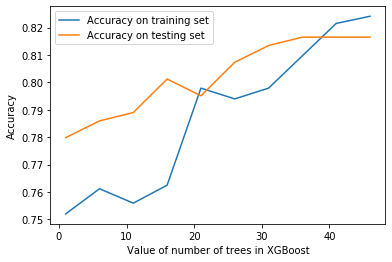

In [43]:
tree_range = range(1, 50, 5)
score1 = []
score2 = []
for tree in tree_range:
    xgb = XGBClassifier(n_estimators = tree)
    xgb.fit(X_train_xg, y_train_xg)
    score1.append(xgb.score(X_train_xg, y_train_xg))
    score2.append(xgb.score(X_test_xg, y_test_xg))
    
%matplotlib inline
plt.plot(tree_range, score1, label = 'Accuracy on training set')
plt.plot(tree_range, score2, label = 'Accuracy on testing set')
plt.xlabel('Value of number of trees in XGBoost')
plt.ylabel('Accuracy')
plt.legend()

In [44]:
clf = XGBClassifier(n_estimators = 40)
clf.fit(X_train_xg, y_train_xg)
print('Accuracy of xgb on the testing data is :{:.3f}'.format(clf.score(X_test_xg, y_test_xg)))

Accuracy of xgb on the testing data is :0.817


In [45]:
# Importing library
from sklearn.metrics import classification_report
# Predictions on train set
y_train_pred = clf.predict(X_train_xg)

# Classification report on train set
print(classification_report(y_train_xg, y_train_pred))

# Predictions on test set
y_test_pred = clf.predict(X_test_xg)

# Classification report on test set
print(classification_report(y_test_xg, y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       384
           1       0.85      0.76      0.81       378

    accuracy                           0.82       762
   macro avg       0.82      0.82      0.82       762
weighted avg       0.82      0.82      0.82       762

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       165
           1       0.81      0.82      0.82       162

    accuracy                           0.82       327
   macro avg       0.82      0.82      0.82       327
weighted avg       0.82      0.82      0.82       327



In [46]:
final_model = XGBClassifier(n_estimators = 40)
final_model.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=40, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [47]:
y_test_p = final_model.predict(df_test)
test_pred = pd.Series(y_test_p)
test_pred

0      0
1      0
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Length: 418, dtype: int64

In [48]:
final = pd.concat([test_PID, test_pred], axis=1)
final.rename(columns={0:'Survived'}, inplace=True)
final = final.dropna()
final['Survived'] = final['Survived'].astype(int)
final.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [49]:
# Importing the test data alongwith actuals and predictions to csv file
final.to_csv(r'C:\Users\rkashya1\Downloads\Python\Kag_Titanic\final.csv', index = False)